In [3]:
# --- Plot Figure 1: Population Parameters --- 

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

#Init Variables
init_folder='/home/traaffneu/margal/code/multirat_se/scripts/'
output_folder = '/project/4180000.19/multirat_stim/scratch/plots/population/'

metadata_path ='/home/traaffneu/margal/code/multirat_se/script/table/metadata_stand.tsv'
df = pd.read_csv(metadata_path, sep='\t')

metadata = pd.concat([df['rat.sex'].value_counts(sort=False),
                    df['rat.strain'].value_counts(sort=False), 
                    df['anesthesia.induction'].value_counts(sort=False), 
                    df['func.sensory.stimulation'].value_counts(sort=False), 
                    df['func.sensory.system'].value_counts(sort=False), 
                    df['MRI.field.strength'].value_counts(sort=False)], axis=1)

metadata = metadata.sort_values(by=metadata.columns.tolist(), ascending=False)
metadata = metadata.rename(index={key: ' '.join(word.title() if word != 'S1FL' else word for word in key.split()) if isinstance(key, str) else key for key in metadata.index})  #add capital letter to each row , while preserving already existing caps

desired_order = sorted(metadata.index[-6:], key=lambda x: float(x))              #change order of the filed strength rows
metadata = metadata.reindex(desired_order + metadata.index[:-6].tolist())        # ascending order of values per column

metadata = metadata/metadata.sum()*100
metadata = metadata.rename(columns={"rat.sex":"Sex", 
                                    "rat.strain":"Strain", 
                                    "anesthesia.induction":"Anesthesia",
                                    "func.sensory.stimulation":"Stimulation Type", 
                                    "func.sensory.system":"Stimulation Location",
                                    "MRI.field.strength":"MRI Field Strength"})

metadata = metadata.fillna(0)

print(metadata)

                                     Sex     Strain  Anesthesia  \
4.7                             0.000000   0.000000    0.000000   
7.0                             0.000000   0.000000    0.000000   
9.4                             0.000000   0.000000    0.000000   
14.0                            0.000000   0.000000    0.000000   
14.1                            0.000000   0.000000    0.000000   
17.2                            0.000000   0.000000    0.000000   
Male                           64.088398   0.000000    0.000000   
Female                         35.911602   0.000000    0.000000   
Sprague Dawley                  0.000000  56.353591    0.000000   
Wistar                          0.000000  27.071823    0.000000   
Fischer 344                     0.000000  16.574586    0.000000   
Isoflurane / Medetomidine       0.000000   0.000000   50.828729   
Isoflurane                      0.000000   0.000000   38.674033   
Isoflurane / Alpha-Chloralose   0.000000   0.000000    5.52486

In [10]:
# -- Figure 1a --

fig = go.Figure()
annotations = []

# categories = ['MRI field strength', 'stimulation location', 'stimulation type', 'anesthesia', 'strain', 'sex']
# colors = ['rgba(204, 0, 0, 0.8)', 'rgba(204, 102, 0, 0.8)', 'rgba(153, 153, 0, 0.8)', 'rgba(0, 153, 153, 0.8)', 'rgba(102, 0, 204, 0.8)', 'rgba(204, 0, 102, 0.8)']
# magma = ['rgba(0.135053, 0.068391, 0.315)', 'rgba(0.372116, 0.092816, 0.499053)', 'rgba(0.594508, 0.175701, 0.501241)', 'rgba(0.828886, 0.262229, 0.430644)', 'rgba(0.973381, 0.46152, 0.361965)', 'rgba(0.997341, 0.733545, 0.505167)'] #magma in seaborn

categories = ['MRI Field Strength', 'Strain', 'Sex']
blues = ['rgba(0.7309496347558632, 0.8394771241830065, 0.9213225682429834)', 'rgba(0.32628988850442137, 0.6186236063052672, 0.802798923490965)', 'rgba(0.044059976931949255, 0.3338869665513264, 0.6244521337946944)']

for category, color in zip(categories, blues):
    y_label = category
    yd = y_label

    space = 0
    for x_label, xd in metadata[y_label].items():
        fig.add_trace(go.Bar(
            y=[yd],
            x=[xd],
            #name= x_label,
            orientation='h',
            marker=dict(
                color=color,
                line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
            )
        ))

        annotations.append(dict(
                                xref='x', 
                                yref='y',
                                x=space + xd / 2, y=yd,
                                text=x_label,
                                font=dict(family='Arial', 
                                          size=14,
                                          color='rgb(0, 0, 0)'),
                                showarrow=False,
                                ))

        space += xd


layout = go.Layout(
    title='Figure 1a. Population parameters',
    barmode='stack',
    yaxis=dict(title='Categories', showticklabels=True),
    xaxis=dict(title='Percentage',tickformat=".f", ),
    showlegend=True,
    annotations=annotations)

fig.update_layout(layout, showlegend=False)


fig.update_layout(barmode='stack',
                 showlegend=False)


plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/population/scratch_population_parameters.svg', format='svg', dpi=100)
#fig.write_image('/project/4180000.19/multirat_stim/scratch/plots/population/scratch_population_parameters.pmg', format='png')

fig.show()


<Figure size 640x480 with 0 Axes>

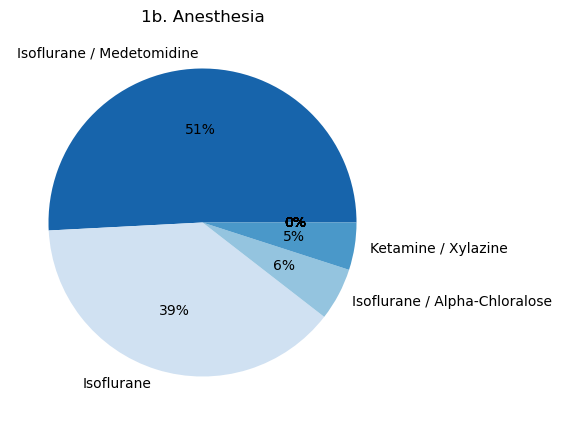

In [2]:
#-- Fig 1.b -- 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5 , 5))

magma = [(0.594508, 0.175701, 0.501241), (0.828886, 0.262229, 0.430644), (0.973381, 0.46152, 0.361965), (0.997341, 0.733545, 0.505167)]
crest = [(0.48942421, 0.72854938, 0.56751036), (0.34892097, 0.64828676, 0.56513633), (0.24929311, 0.56486397, 0.5586654), (0.15615526, 0.47913212, 0.54850526), (0.11131735, 0.39155635, 0.53422678), (0.14573579, 0.29354139, 0.49847009)]
blues = [(0.8584083044982699, 0.9134486735870818, 0.9645674740484429), (0.7309496347558632, 0.8394771241830065, 0.9213225682429834), (0.5356862745098039, 0.746082276047674, 0.8642522106881968), (0.32628988850442137, 0.6186236063052672, 0.802798923490965), (0.16696655132641292, 0.48069204152249134, 0.7291503267973857), (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]


sns.set_palette(sns.color_palette('Blues', n_colors=4))

#sns.set_palette("colorblind")

ax1 = metadata['Anesthesia'].plot.pie(title='1b. Anesthesia', autopct="%.f%%")
ax1.set(xlabel="", ylabel="")

#plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/population/fig_1b_anesthesia.png', format='png', dpi=1200)
plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/population/fig_1b_anesthesia.svg', format='svg', dpi=1200)





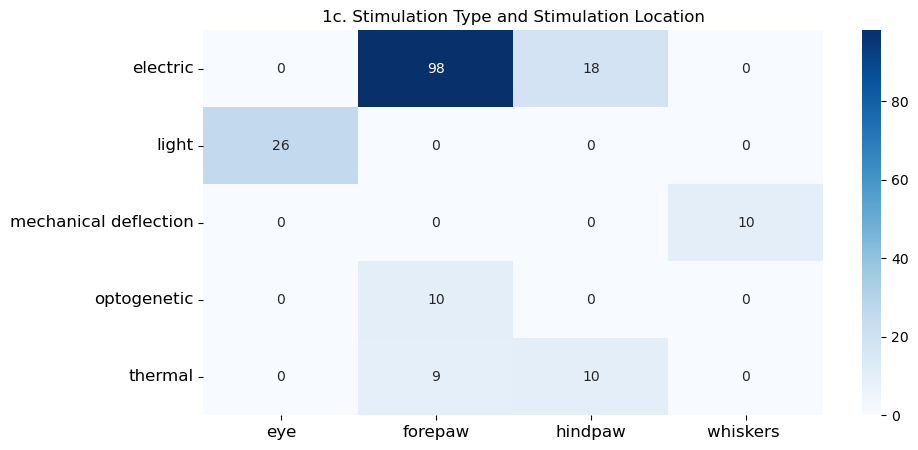

In [5]:
#-- Fig 1. -- 

plt.figure(figsize=(10, 5))
heatmap_data = df.groupby(['func.sensory.stimulation', 'func.sensory.system']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('1c. Stimulation Type and Stimulation Location')
plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/population/fig_1c_stim.png', format='png', dpi=1200)
plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/population/fig_1c_stim.svg', format='svg', dpi=1200)

plt.show()


[(0.8141176470588235, 0.883921568627451, 0.9498039215686275), (0.5796078431372549, 0.7701960784313725, 0.8737254901960784), (0.2909803921568628, 0.5945098039215686, 0.7890196078431373), (0.09019607843137256, 0.39294117647058824, 0.6705882352941177)]


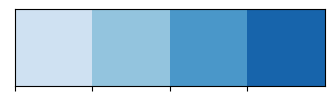

In [12]:
# - display seaborn palette - 
pal = sns.color_palette('Blues', n_colors=4)
print(pal)
sns.palplot(pal)

In [172]:
# -- old version of plot 1a -- 

import plotly.graph_objects as go

annotations = []
fig = go.Figure()

#---------------------------- MRI field strength -------------------------------------- 

y_label = 'MRI Field Strength'     #refers to the column name of metadata[]
yd = y_label                         #define the name of the bar line

x_label = 4.7
xd = metadata[y_label][x_label]
space = 0

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(204, 0, 102, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


space = space + xd
x_label = 9.4
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 0, 127, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


space = space + xd
x_label = 7.0
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 51, 153, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


space = space + xd
x_label = 14.1
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 102, 178, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


space = space + xd
x_label = 17.2
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 102, 178, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 14.0
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 102, 178, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))



#--------------------------- stimulation location -------------------------------------- 

y_label = 'Stimulation Location'     #refers to the column name of metadata[]
yd = y_label                         #define the name of the bar line

x_label = 'Forepaw'
xd = metadata[y_label][x_label]
space = 0

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(102, 0, 204, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Hindpaw'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(127, 0, 255, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'S1FL'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(153, 51, 255, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Whiskers C-Row'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(178, 102, 255, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Eye'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(204, 153, 255, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


#----------------------------- stimulation type -------------------------------------- 

y_label = 'Stimulation Type'     #refers to the column name of metadata[]
yd = y_label                      #define the name of the bar line

x_label = 'Electric'
xd = metadata[y_label][x_label]
space = 0

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(0, 153, 153, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))



space = space + xd
x_label = 'Optogenetic'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(0, 204, 204, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = 'opto.',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


space = space + xd
x_label = 'Thermal'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(0, 255, 255, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Light'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(0, 255, 255, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Mechanical Deflection'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(0, 255, 255, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = 'mecha.',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


#-------------------------------- anesthesia -------------------------------------- 

y_label = 'Anesthesia'        #refers to the column name of metadata[]
yd = y_label                  #define the name of the bar line

x_label = 'Isoflurane'
xd = metadata[y_label][x_label]
space = 0

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(153, 153, 0, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Isoflurane / Medetomidine'
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(204, 204, 0, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Isoflurane / Alpha-Chloralose'
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 255, 0, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Ketamine / Xylazine'
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 255, 102, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


#---------------------------------- strain -------------------------------------- 

y_label = 'Strain'     #refers to the column name of metadata[]
yd = y_label        #define the name of the bar line

x_label = 'Wistar'
xd = metadata[y_label][x_label]
space = 0

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(204, 102, 0, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Sprague Dawley'
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 128, 0, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))

space = space + xd
x_label = 'Fischer 344'
xd = metadata[y_label][x_label]

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 153, 51, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


#---------------------------------- Sex -------------------------------------- 

y_label = 'Sex'     #refers to the column name of metadata[]
yd = y_label        #define the name of the bar line

x_label = 'Male'
xd = metadata[y_label][x_label]
space = 0

fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(204, 0, 0, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x = space + xd/2, y = yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))


space = space + xd
x_label = 'Female'
xd = metadata[y_label][x_label]


fig.add_trace(go.Bar(
    y = [yd],
    x = [xd],
    name = x_label,
    orientation='h',
    marker=dict(
        color='rgba(255, 0, 0, 0.8)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=1)
    )
))

annotations.append(dict(xref='x', yref='y',
                                    x= space + xd / 2, y= yd,
                                    text = x_label,
                                    font=dict(family='Arial', size=14,
                                              color='rgb(0, 0, 0)'),
                                    showarrow=False))



#---------------------------------- Plot -------------------------------------- 

fig.update_layout(annotations=annotations)
fig.update_layout(barmode='stack', title='Figure 1a. Population parameters')

plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/population/population_parameters.png', format='png', dpi=1200) 
#fig.write_image('/project/4180000.19/multirat_stim/scratch/plots/population/scratch_population_parameters.png', format='png')

fig.show()



<Figure size 640x480 with 0 Axes>